# Plots y visualización de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
%matplotlib inline

In [5]:
#Guardar figura -> savefig("path_donque_la_quiera_guardar.jpeg")

# Scatter Plot

Gráficas de dispersión

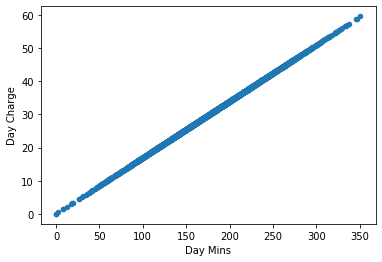

In [6]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

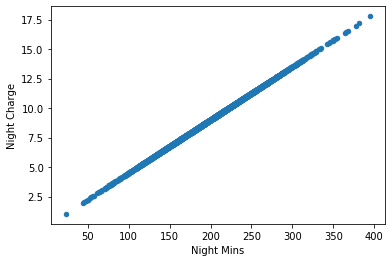

In [7]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

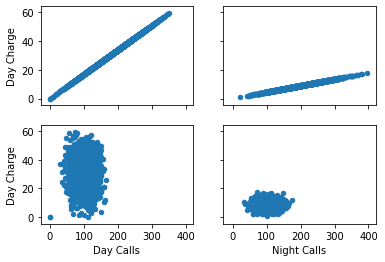

In [8]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histograma de Frecuencias

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

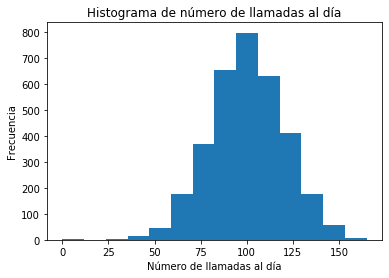

In [9]:
k=int(np.ceil(1+np.log2(3333)))
plt.hist(data["Day Calls"], bins=1+k)#La función bins particiona los datos en intervalos bins=[0,30,60,90, ...]
#La regla de Sturges determina cómo particionar un histograma c=1+log2(M) M=La muestra
#k=int(np.ceil(1+np.log2(3333))) ceil: redondea, int: convierte a entero
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

### Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

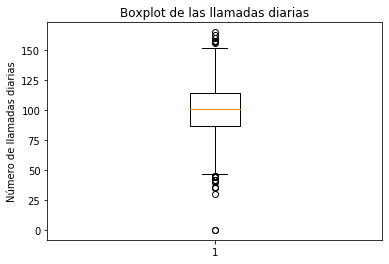

In [10]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")
#El Boxplot permite identificar donde se condensa el 25% y 75% de la información
#La línea amarilla que atraviesa la caja es la media
#Permite saber donde se centran los valores, saber hasta donde llegan los rangos intercuantilicos
#Todo lo que supera 1.5 por debajo del primer cuartil o por arriba del tercer cuartil, lo representa en círculos
#llamados bigotes, se le llama out layer (Valor fuera de lugar)

In [11]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [12]:
#IQR=114-87 Rango intercuartilico proviene de la diferencia entre en 75% y el 25% de los datos
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)#Es lo mismo que arriba
IQR

27.0

In [13]:
data["Day Calls"].quantile(0.25) - 1.5*IQR #Al cuantil 25% se le resta 1.5 veces del rango intercuantilico
#En 46.5 es donde acaba el bigote inferior

46.5

In [14]:
data["Day Calls"].quantile(0.75) + 1.5*IQR #Al cuantil 75% se le suma 1.5 veces del rango intercuantilico
#En 154.5 es donde acaba el bigote superior

154.5